In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from agage_archive.io import read_nc, read_c, combine_datasets, read_ale_gage, Paths, scale_convert

paths = Paths()

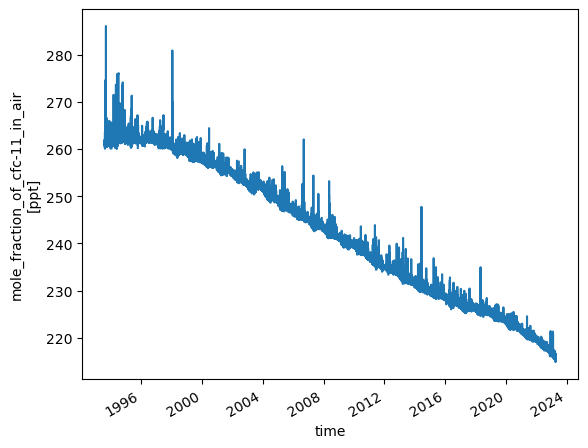

In [2]:
df_CGO = read_nc("cfc-11", "CGO", "GCMD")

df_CGO.mf.plot()


In [3]:
df_CGO

<xarray.Dataset>
Dimensions:                   (time: 326773)
Coordinates:
  * time                      (time) datetime64[ns] 1993-08-10T05:02:00 ... 2...
Data variables:
    inlet_height              (time) int32 10 70 10 70 10 70 ... 70 70 70 70 70
    mf                        (time) float32 nan nan nan nan ... 215.7 215.4 nan
    mf_repeatability          (time) float32 nan nan nan ... 0.1481 0.1405 nan
    data_flag                 (time) int8 70 70 70 70 70 70 70 ... 0 0 0 0 0 0 0
    integration_flag          (time) int8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    git_pollution_flag        (time) int8 66 66 66 66 66 66 66 ... 0 0 0 0 0 0 0
    met_office_baseline_flag  (time) int8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
Attributes: (12/13)
    comment:                    AGAGE GCMD measurements. Output from GCWerks....
    data_owner_email:           paul.krummel@csiro.au
    data_owner:                 Paul Krummel
    station_long_name:          Kennaook/Cape Grim, Tasmania, Australia
    inlet_base_elevation_masl:  94.000000
    inlet_latitude:             -40.683000
    ...                         ...
    inlet_comment:              multiple inlets have been used at the station...
    data_dir:                   /agage/capegrim
    species:                    cfc-11
    calibration_scale:          SIO-05
    units:                      ppt
    file_created:               2023-04-11 08:18:30

In [14]:
df_ale_gage = read_ale_gage("N2O", "SMO", "GAGE")

<Axes: >

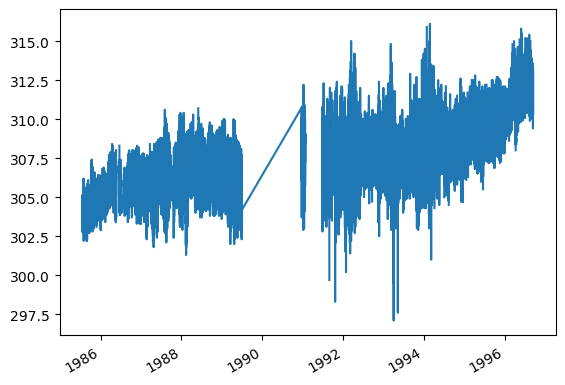

In [15]:
df_ale_gage["mf"].plot()

In [22]:
mf = scale_convert("N2O", "SIO-93", "SIO-05", df_ale_gage.index, df_ale_gage["mf"].values.copy())

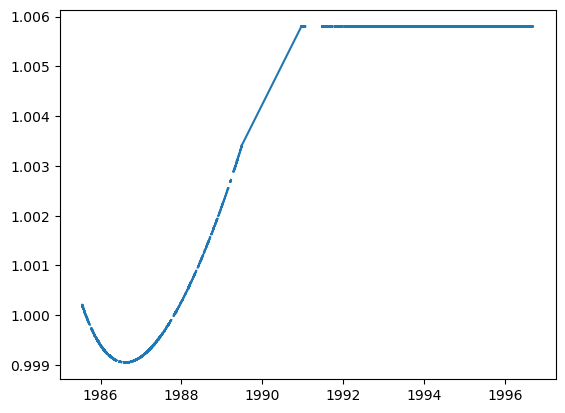

In [24]:
plt.plot(df_ale_gage.index, mf/df_ale_gage["mf"].values)
